<a href="https://colab.research.google.com/github/sadrireza/Neural-Networks/blob/main/LargerSineCosineModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [175]:
# Generate some sample data for Sine and Cosine functions
x_train = np.linspace (0,5*np.pi/2,1000) #input values
y_train = np.sin(x_train) #corresponding sine values
z_train = np.cos(x_train) #corresponding cosine values

In [176]:
# Define the Sine model Architecture
sinmodel = tf.keras.Sequential ([
    tf.keras.layers.Dense(128,activation='relu',input_shape=(1,)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1)
])

# Define the Cosine model Architecture
cosmodel = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation='relu',input_shape=(1,)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1)
])

In [177]:
# Compile the Sine model
sinmodel.compile(optimizer='adam', loss='huber')
#sinmodel.compile(optimizer='adam', loss='MSE')
#sinmodel.compile(optimizer='adamax', loss='MSE')
#sinmodel.compile(optimizer='sgd', loss='MSE')
#sinmodel.compile(optimizer='nadam', loss='MSE')
#sinmodel.compile(optimizer='nadam', loss='huber')
#sinmodel.compile(optimizer='adam', loss='MAE')

In [178]:
# Compile the Cosine model
#cosmodel.compile(optimizer='adam', loss='huber')
#cosmodel.compile(optimizer='RMSprop', loss= 'MSE')
cosmodel.compile(optimizer='adam', loss= 'MSE')
#cosmodel.compile(optimizer='nadam', loss= 'MSE')
#cosmodel.compile(optimizer='adamax', loss= 'MSE')
#cosmodel.compile(optimizer='adam', loss= 'MAE')
#cosmodel.compile(optimizer='nadam', loss= 'huber')

In [179]:
# Training the Sine model
sinmodel.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)

In [180]:
# Training the Cosine model
cosmodel.fit(x_train, z_train, epochs=100, batch_size=32, verbose=0)

In [181]:
#True Values
angles = [np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4, 2*np.pi, 9*np.pi/4, 5*np.pi/2]

# Calculate sine of each angle and print
for angle in angles:
    sine_value = np.sin(angle)
    print(sine_value)

0.7071067811865475
1.0
0.7071067811865476
1.2246467991473532e-16
-0.7071067811865475
-1.0
-0.7071067811865477
-2.4492935982947064e-16
0.7071067811865474
1.0


In [182]:
# Prediction using the trained Sine model
x_test=np.array([np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4, 2*np.pi, 9*np.pi/4, 5*np.pi/2])
sinpredictions=sinmodel.predict(x_test)
print(sinpredictions)

1/1 [==============================] - 0s 71ms/step
[[ 7.0924729e-01]
 [ 9.9867535e-01]
 [ 7.0566034e-01]
 [ 5.7481229e-06]
 [-7.0530927e-01]
 [-9.9216461e-01]
 [-7.0642090e-01]
 [-1.4089383e-03]
 [ 7.0796967e-01]
 [ 1.0665414e+00]]


In [183]:
# True Values
angles = [np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4, 2*np.pi, 9*np.pi/4, 5*np.pi/2]

# Prediction using the trained Sine model
x_test = np.array([np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4, 2*np.pi, 9*np.pi/4, 5*np.pi/2])
sinpredictions = sinmodel.predict(x_test)

# Calculate percentage difference for each prediction
for i in range(len(angles)):
    true_value = np.sin(angles[i])
    predicted_value = sinpredictions[i][0]  # Access the predicted value from the array
    percentage_difference = abs((predicted_value - true_value) / true_value) * 100
    print(f"Percentage difference for angle {angles[i]}: {percentage_difference:.2f}%")

1/1 [==============================] - 0s 43ms/step
Percentage difference for angle 0.7853981633974483: 0.30%
Percentage difference for angle 1.5707963267948966: 0.13%
Percentage difference for angle 2.356194490192345: 0.20%
Percentage difference for angle 3.141592653589793: 4693698570401.14%
Percentage difference for angle 3.9269908169872414: 0.25%
Percentage difference for angle 4.71238898038469: 0.78%
Percentage difference for angle 5.497787143782138: 0.10%
Percentage difference for angle 6.283185307179586: 575242722829020.88%
Percentage difference for angle 7.0685834705770345: 0.12%
Percentage difference for angle 7.853981633974483: 6.65%


In [184]:
#Prediction using the trained Cosine model
x_test=np.array([np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4, 2*np.pi, 9*np.pi/4, 5*np.pi/2])
cospredictions=cosmodel.predict(x_test)
print(cospredictions)

1/1 [==============================] - 0s 76ms/step
[[ 0.6919207 ]
 [-0.02670961]
 [-0.72154117]
 [-1.0072308 ]
 [-0.7184635 ]
 [-0.00167032]
 [ 0.68759507]
 [ 0.97853214]
 [ 0.66717976]
 [-0.01469835]]


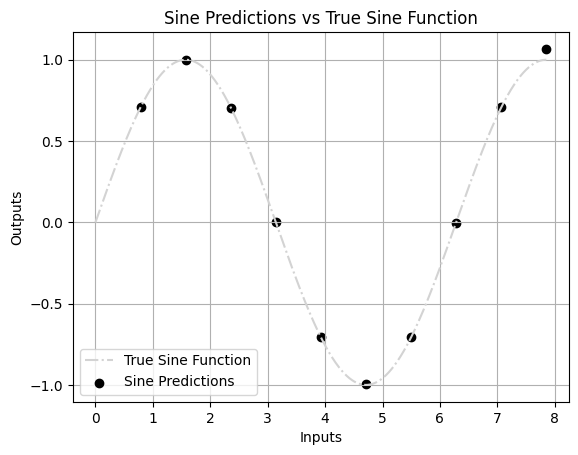

In [185]:
#Plot the true Sine function
plt.plot(x_train, y_train, label= 'True Sine Function', color='lightgrey', linestyle='dashdot')

#Plot the predicted value
plt.scatter(x_test, sinpredictions, label='Sine Predictions', color='black')

plt.xlabel('Inputs')
plt.ylabel('Outputs')
plt.title('Sine Predictions vs True Sine Function')
plt.legend()
plt.grid(True)
plt.show()

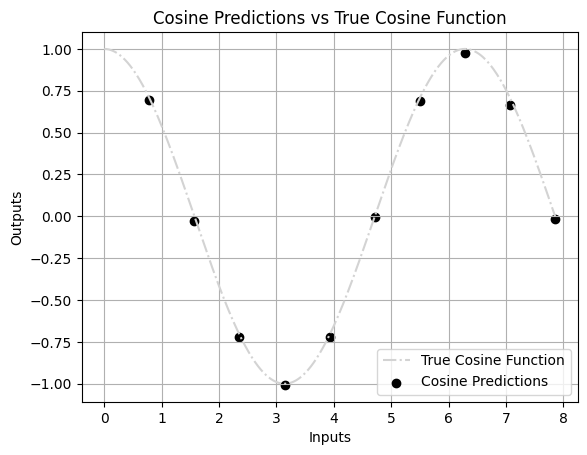

In [186]:
#Plot the true Cosine function
plt.plot(x_train, z_train, label= 'True Cosine Function', color='lightgrey', linestyle='dashdot')

#Plot the predicted value
plt.scatter(x_test, cospredictions, label='Cosine Predictions', color='black')

plt.xlabel('Inputs')
plt.ylabel('Outputs')
plt.title('Cosine Predictions vs True Cosine Function')
plt.legend()
plt.grid(True)
plt.show()